In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
%matplotlib inline

### 1 a) Load each of the single feature data sets and plot the data to get an idea of the complexity of the problem


In [2]:
def load_data(dataset):
    """
        Args : dataset is a string mentioning the dataset location and name
                -- assumes the format is .dat
        Output : Returns 2 numpy arrays
    """
    X,Y = np.loadtxt(dataset+".dat",unpack=True)
    return X,Y

def plot_data(dataset,
              predict_Y,
              x_label = "X",
              y_label = "Y",
              figure_name = False,
              predict_Y_flag = False,
              polynomial_flag = False):
    """
        Args : 
                dataset : it is a string mentioning the dataset name alone without path or extension
                figure_name : it is used for saving the plot. if it is not set, it works as a flag.
                x_label : Label value for x axis
                y_label : Label value for y axis
                
        Returns : 
                Null
    """
    X,Y = load_data("data/"+dataset)
    plt.plot(X,Y,"o",color="w")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(dataset)
    
    if predict_Y_flag:
        plt.plot(X,predict_Y,color = "r")
    
    if polynomial_flag:
        plt.plot(X,predict_Y,"o",color = "r")
    
    if figure_name:
        plt.savefig(figure_name)
    plt.show()

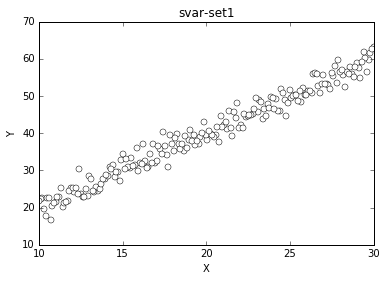

In [3]:
plot_data("svar-set1","Result1.pdf")

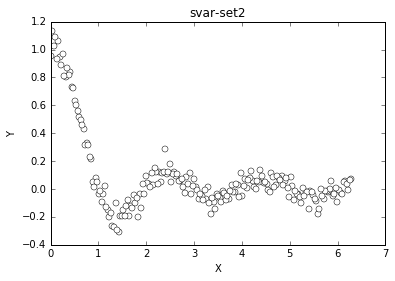

In [4]:
plot_data("svar-set2","Result2.pdf")

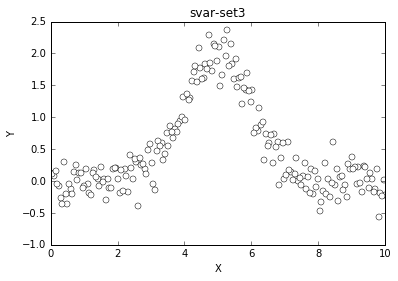

In [5]:
plot_data("svar-set3","Result3.pdf")

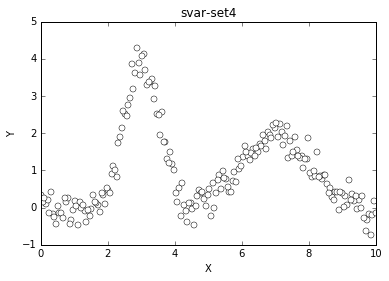

In [6]:
plot_data("svar-set4","Result4.pdf")

### 1 b) Fit a linear model to the data. Compute the training error and testing error, and compare them. Plot the regression model obtained on top of the test data

In [7]:
def single_feature_linear_regression(X,Y):
    """
        Args : 
                X : training data
                Y : prediction_value
        Returns :
                theta : parameters for the linear regression
    """
    
    m = len(X)
    sum_of_x = X.sum()
    sum_of_x_square = (X*X).sum()
    A = np.array( [[ m , sum_of_x] ,
                   [ sum_of_x, sum_of_x_square ]] )

    sum_of_y = Y.sum()
    sum_of_xy = np.multiply(X,Y).sum()
    b = np.array([[sum_of_y], [sum_of_xy]])

    theta = solve(A,b)
    
    return theta

In [8]:
def calculate_error(predict_Y,Y):
    m = len(predict_Y)
    avg = np.mean(Y)
    error = 0.
    for idx in range(m):
        numerator = (predict_Y[idx]- Y[idx])**2
        denominator = (Y[idx]- avg)**2
        error = error + (numerator/denominator)
    return error/m

In [9]:
def do_single_feature_linear_regression_experiment(dataset, n_folds=10,verbose=True):
    """
    Args :
            dataset : it is a string mentioning the dataset name alone without path or extension
            n_folds : it is the number of folds to be passed in KFold(), which controls the training data.
                      Lower the n_folds value, less training data will be used. Value must be at least 2.
    """
    X,Y = load_data("data/"+dataset)
    cv = cross_validation.KFold(len(Y),n_folds,shuffle=True,random_state=5)
    avg_test_error = []
    avg_train_error = []
    
    fold = 0
    for train_ind, test_ind in cv:
        fold= fold + 1
        theta = single_feature_linear_regression(X[train_ind],Y[train_ind])
        
        #Calculating training error
        predict_Y_train =  theta[0] + X[train_ind]*theta[1]
        train_error = calculate_error(predict_Y_train,Y[train_ind])
        
        #Calculating testing error
        predict_Y_test =  theta[0] + X[test_ind]*theta[1]
        test_error = calculate_error(predict_Y_test,Y[test_ind])
        
        avg_train_error.append(train_error)
        avg_test_error.append(test_error)
        
        
        #Comparing custom model with scikit-learn's model
        regr = LinearRegression()
        regr.fit(X[train_ind].copy().reshape(-1,1),Y[train_ind].copy())
        
        if not verbose:
            print("For Fold : %d" % fold)
            print("Training error : %.4f & Testing error : %.4f" %(train_error,test_error))
        
        if verbose:
            print("\nDifferences in theta values of custom and scikitlearn's model")
            print(" Intercept of scikit's model : %f" % regr.intercept_)
            print(" Intercept of custom's model : %f" % theta[0][0])
        
            print(" Intercept of scikit's model : %f" %  regr.coef_[0])
            print(" Intercept of custom's model : %f" % theta[1][0])
            print "\n"
            
        
    print("\nCustom model's Avg Training error : %.4f & Avg Testing error : %.4f for %d folds" 
          %(np.mean(avg_train_error),np.mean(avg_test_error),n_folds))
    
    theta = single_feature_linear_regression(X,Y)
    predict_Y =  theta[0] + X*theta[1]
    if verbose:
        plot_data(dataset,predict_Y=predict_Y,predict_Y_flag = True)
    


Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.327556
 Intercept of custom's model : 0.327556
 Intercept of scikit's model : 1.987673
 Intercept of custom's model : 1.987673



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.004242
 Intercept of custom's model : 0.004242
 Intercept of scikit's model : 1.996730
 Intercept of custom's model : 1.996730



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.221751
 Intercept of custom's model : 0.221751
 Intercept of scikit's model : 1.986008
 Intercept of custom's model : 1.986008



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.226191
 Intercept of custom's model : 0.226191
 Intercept of scikit's model : 1.986588
 Intercept of custom's model : 1.986588



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.6772

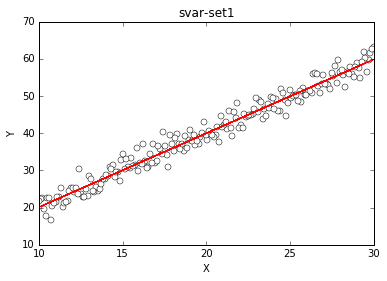

In [10]:
do_single_feature_linear_regression_experiment("svar-set1")

In [11]:
do_single_feature_linear_regression_experiment("svar-set1",n_folds = 2,verbose = False)

For Fold : 1
Training error : 31.7130 & Testing error : 1.0487
For Fold : 2
Training error : 1.0835 & Testing error : 31.9050

Custom model's Avg Training error : 16.3983 & Avg Testing error : 16.4769 for 2 folds


In [12]:
do_single_feature_linear_regression_experiment("svar-set1",n_folds = 5,verbose = False)

For Fold : 1
Training error : 9.7431 & Testing error : 1.0924
For Fold : 2
Training error : 149.5525 & Testing error : 14.4439
For Fold : 3
Training error : 3.1660 & Testing error : 1.7632
For Fold : 4
Training error : 10.5634 & Testing error : 5.3710
For Fold : 5
Training error : 8.7357 & Testing error : 0.2944

Custom model's Avg Training error : 36.3521 & Avg Testing error : 4.5930 for 5 folds


In [13]:
do_single_feature_linear_regression_experiment("svar-set1",n_folds = 8,verbose = False)

For Fold : 1
Training error : 15.7729 & Testing error : 0.2500
For Fold : 2
Training error : 1063.9064 & Testing error : 0.7944
For Fold : 3
Training error : 122.5017 & Testing error : 2.7801
For Fold : 4
Training error : 1.4709 & Testing error : 4.2778
For Fold : 5
Training error : 18.5818 & Testing error : 0.1196
For Fold : 6
Training error : 7.7731 & Testing error : 1.5880
For Fold : 7
Training error : 31.1576 & Testing error : 0.0965
For Fold : 8
Training error : 38.6945 & Testing error : 0.7252

Custom model's Avg Training error : 162.4824 & Avg Testing error : 1.3289 for 8 folds


In [14]:
do_single_feature_linear_regression_experiment("svar-set1",n_folds = 10,verbose = False)

For Fold : 1
Training error : 3179.4160 & Testing error : 0.2224
For Fold : 2
Training error : 5.6490 & Testing error : 170.4716
For Fold : 3
Training error : 7.3808 & Testing error : 3.2688
For Fold : 4
Training error : 29.4185 & Testing error : 12.8015
For Fold : 5
Training error : 2.7956 & Testing error : 0.2446
For Fold : 6
Training error : 395.5426 & Testing error : 0.1493
For Fold : 7
Training error : 4.7095 & Testing error : 2.6982
For Fold : 8
Training error : 4.5734 & Testing error : 0.0963
For Fold : 9
Training error : 146.6772 & Testing error : 0.0655
For Fold : 10
Training error : 85.9151 & Testing error : 0.5385

Custom model's Avg Training error : 386.2078 & Avg Testing error : 19.0557 for 10 folds


### Polynomial model

In [15]:
def construct_z(X,n):
    """
        Args : 
                X : data matrix
                n : Order of polynomial
    """
    Z = []
    for i in range(len(X)):
        Z_i = [ X[i]**x for x in range(n+1) ]
        Z.append(Z_i)
    return np.array(Z)
    

In [16]:
def single_feature_polynomial_regression(X,Y,n):
    """
        Args : 
                X : training data
                Y : prediction_value
        Returns :
                theta : parameters for the linear regression
    """
    
    Z = construct_z(X,n)
    Z_T = np.transpose(Z.copy())
    theta = dot(dot(inv(dot(Z_T,Z)),Z_T),Y)
    
    return theta

In [17]:
def do_single_feature_polynomial_linear_regression_experiment(dataset,n,verbose = False,n_folds = 10):
    """
        Args:
                dataset : it is a string mentioning the dataset name alone without path or extension
                n : Order of polynomial
    """
    X,Y = load_data("data/"+dataset)
    cv = cross_validation.KFold(len(Y),n_folds,shuffle=True,random_state=5)
    avg_test_error = []
    avg_train_error = []
    
    fold = 0
    for train_ind, test_ind in cv:
        fold= fold + 1
        
        theta = single_feature_polynomial_regression(X[train_ind],Y[train_ind],n)
        
        #Calculating training error
        Z = construct_z(X[train_ind],n)
        predict_Y_train = dot(theta,np.transpose(Z))
        train_error = calculate_error(predict_Y_train,Y[train_ind])
        
        #Calculating testing error
        Z = construct_z(X[test_ind],n)
        predict_Y_test = dot(theta,np.transpose(Z))
        test_error = calculate_error(predict_Y_test,Y[test_ind])
        
        avg_train_error.append(train_error)
        avg_test_error.append(test_error)
        
        if verbose:
            print("For Fold : %d" % fold)
            print("Training error : %.4f & Testing error : %.4f" %(train_error,test_error))
            
        
    print("\nCustom model's Avg Training error : %.4f & Avg Testing error : %.4f for %d folds" 
          %(np.mean(avg_train_error),np.mean(avg_test_error),fold))
    
    
    theta = single_feature_polynomial_regression(X,Y,n)
    Z = construct_z(X,n)
    predict_Y = dot(theta,np.transpose(Z))
    plot_data(dataset,predict_Y=predict_Y,polynomial_flag = True)

### Second dataset : svar-set2 : Single feature polynomial regression


Custom model's Avg Training error : 1030.4597 & Avg Testing error : 34.3051 for 10 folds


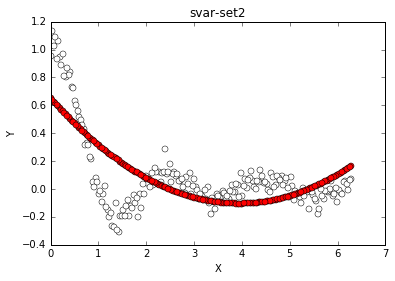

In [19]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=2)


Custom model's Avg Training error : 1392.5631 & Avg Testing error : 26.8546 for 10 folds


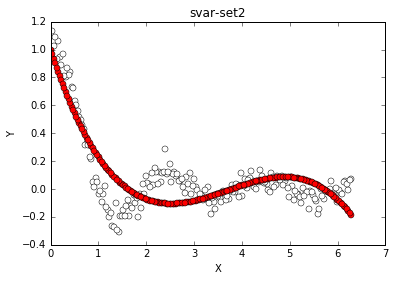

In [20]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=3)


Custom model's Avg Training error : 449.7799 & Avg Testing error : 17.7445 for 10 folds


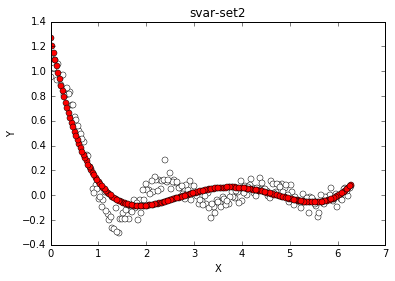

In [21]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=4)


Custom model's Avg Training error : 361.9985 & Avg Testing error : 11.7978 for 10 folds


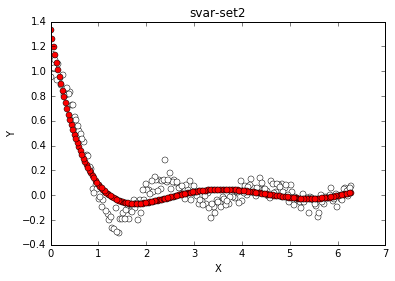

In [22]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=5)


Custom model's Avg Training error : 329.9620 & Avg Testing error : 13.1390 for 10 folds


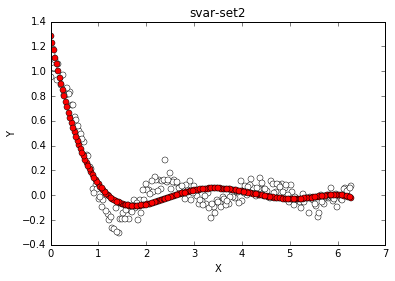

In [70]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=6)


Custom model's Avg Training error : 81.8312 & Avg Testing error : 9.0837 for 10 folds


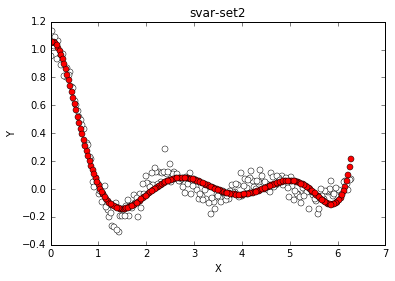

In [23]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=7)


Custom model's Avg Training error : 116.6110 & Avg Testing error : 5.4436 for 10 folds


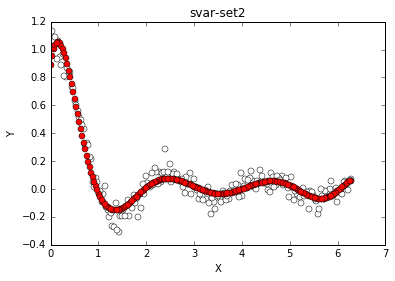

In [24]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=8)


Custom model's Avg Training error : 58.4887 & Avg Testing error : 9.4133 for 10 folds


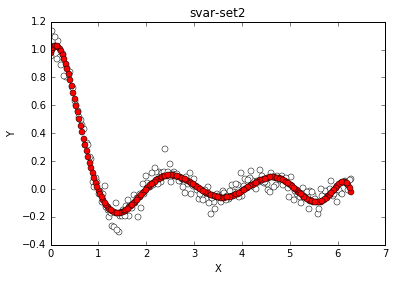

In [26]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=9)


Custom model's Avg Training error : 116.8402 & Avg Testing error : 8.9512 for 10 folds


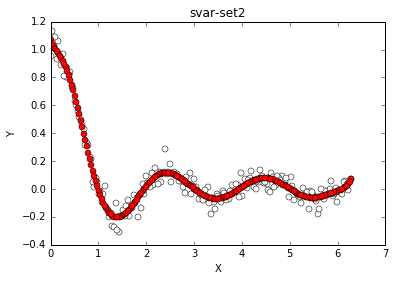

In [25]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=10)


Custom model's Avg Training error : 110.0878 & Avg Testing error : 8.9145 for 10 folds


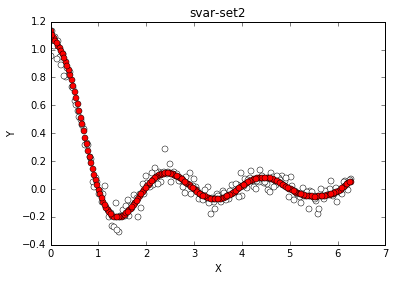

In [27]:
do_single_feature_polynomial_linear_regression_experiment("svar-set2",n=15)

### Second data set : svar-set2 : Single feature linear regression


Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.357413
 Intercept of custom's model : 0.357413
 Intercept of scikit's model : -0.083584
 Intercept of custom's model : -0.083584



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.321542
 Intercept of custom's model : 0.321542
 Intercept of scikit's model : -0.076018
 Intercept of custom's model : -0.076018



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.322738
 Intercept of custom's model : 0.322738
 Intercept of scikit's model : -0.075167
 Intercept of custom's model : -0.075167



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.324695
 Intercept of custom's model : 0.324695
 Intercept of scikit's model : -0.076463
 Intercept of custom's model : -0.076463



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model 

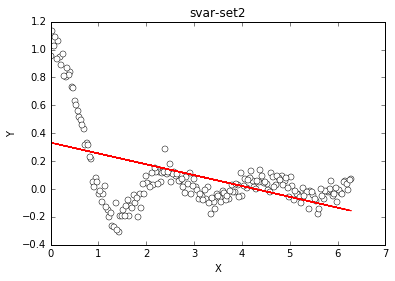

In [208]:
do_single_feature_linear_regression_experiment("svar-set2")

In [90]:
do_single_feature_linear_regression_experiment("svar-set2",n_folds = 2,verbose = False)

For Fold : 1
Training error : 0.0657 & Testing error : 0.0548
For Fold : 2
Training error : 0.0521 & Testing error : 0.0683

Custom model's Avg Training error : 0.0589 & Avg Testing error : 0.0615 for 2 folds


In [91]:
do_single_feature_linear_regression_experiment("svar-set2",n_folds = 5,verbose = False)

For Fold : 1
Training error : 0.0632 & Testing error : 0.0453
For Fold : 2
Training error : 0.0612 & Testing error : 0.0536
For Fold : 3
Training error : 0.0612 & Testing error : 0.0530
For Fold : 4
Training error : 0.0527 & Testing error : 0.0871
For Fold : 5
Training error : 0.0593 & Testing error : 0.0608

Custom model's Avg Training error : 0.0595 & Avg Testing error : 0.0600 for 5 folds


In [92]:
do_single_feature_linear_regression_experiment("svar-set2",n_folds = 7,verbose = False)

For Fold : 1
Training error : 0.0620 & Testing error : 0.0462
For Fold : 2
Training error : 0.0611 & Testing error : 0.0512
For Fold : 3
Training error : 0.0581 & Testing error : 0.0700
For Fold : 4
Training error : 0.0623 & Testing error : 0.0445
For Fold : 5
Training error : 0.0555 & Testing error : 0.0847
For Fold : 6
Training error : 0.0601 & Testing error : 0.0573
For Fold : 7
Training error : 0.0569 & Testing error : 0.0765

Custom model's Avg Training error : 0.0594 & Avg Testing error : 0.0615 for 7 folds


In [93]:
do_single_feature_linear_regression_experiment("svar-set2",n_folds = 10,verbose = False)

For Fold : 1
Training error : 0.0621 & Testing error : 0.0380
For Fold : 2
Training error : 0.0601 & Testing error : 0.0550
For Fold : 3
Training error : 0.0605 & Testing error : 0.0513
For Fold : 4
Training error : 0.0601 & Testing error : 0.0550
For Fold : 5
Training error : 0.0583 & Testing error : 0.0726
For Fold : 6
Training error : 0.0619 & Testing error : 0.0407
For Fold : 7
Training error : 0.0542 & Testing error : 0.1087
For Fold : 8
Training error : 0.0586 & Testing error : 0.0688
For Fold : 9
Training error : 0.0624 & Testing error : 0.0363
For Fold : 10
Training error : 0.0562 & Testing error : 0.0916

Custom model's Avg Training error : 0.0595 & Avg Testing error : 0.0618 for 10 folds


### Third dataset : svar-set3 : : Single feature linear regression


Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.503498
 Intercept of custom's model : 0.503498
 Intercept of scikit's model : 0.001027
 Intercept of custom's model : 0.001027



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.485877
 Intercept of custom's model : 0.485877
 Intercept of scikit's model : -0.004432
 Intercept of custom's model : -0.004432



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.487651
 Intercept of custom's model : 0.487651
 Intercept of scikit's model : 0.001086
 Intercept of custom's model : 0.001086



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.504835
 Intercept of custom's model : 0.504835
 Intercept of scikit's model : -0.004805
 Intercept of custom's model : -0.004805



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.

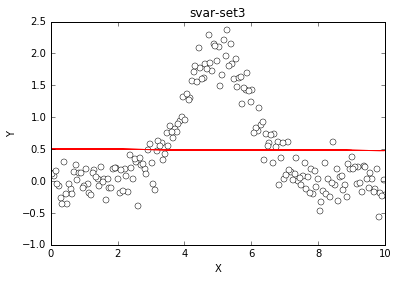

In [91]:
do_single_feature_linear_regression_experiment("svar-set3")

In [94]:
do_single_feature_linear_regression_experiment("svar-set3",n_folds = 2,verbose = False)

For Fold : 1
Training error : 0.3923 & Testing error : 0.6160
For Fold : 2
Training error : 0.5942 & Testing error : 0.4142

Custom model's Avg Training error : 0.4933 & Avg Testing error : 0.5151 for 2 folds


In [95]:
do_single_feature_linear_regression_experiment("svar-set3",n_folds = 5,verbose = False)

For Fold : 1
Training error : 0.4706 & Testing error : 0.6117
For Fold : 2
Training error : 0.4790 & Testing error : 0.5776
For Fold : 3
Training error : 0.5158 & Testing error : 0.4334
For Fold : 4
Training error : 0.5177 & Testing error : 0.4239
For Fold : 5
Training error : 0.5075 & Testing error : 0.4741

Custom model's Avg Training error : 0.4981 & Avg Testing error : 0.5041 for 5 folds


In [96]:
do_single_feature_linear_regression_experiment("svar-set3",n_folds = 7,verbose = False)

For Fold : 1
Training error : 0.5052 & Testing error : 0.4708
For Fold : 2
Training error : 0.4564 & Testing error : 0.7655
For Fold : 3
Training error : 0.4942 & Testing error : 0.5267
For Fold : 4
Training error : 0.5001 & Testing error : 0.4950
For Fold : 5
Training error : 0.5102 & Testing error : 0.4288
For Fold : 6
Training error : 0.5225 & Testing error : 0.3616
For Fold : 7
Training error : 0.4949 & Testing error : 0.5323

Custom model's Avg Training error : 0.4976 & Avg Testing error : 0.5115 for 7 folds


In [97]:
do_single_feature_linear_regression_experiment("svar-set3",n_folds = 9,verbose = False)

For Fold : 1
Training error : 0.5077 & Testing error : 0.4356
For Fold : 2
Training error : 0.4435 & Testing error : 0.9405
For Fold : 3
Training error : 0.4891 & Testing error : 0.5768
For Fold : 4
Training error : 0.5105 & Testing error : 0.4035
For Fold : 5
Training error : 0.4970 & Testing error : 0.5148
For Fold : 6
Training error : 0.4977 & Testing error : 0.5110
For Fold : 7
Training error : 0.5284 & Testing error : 0.2709
For Fold : 8
Training error : 0.5195 & Testing error : 0.3408
For Fold : 9
Training error : 0.4891 & Testing error : 0.5776

Custom model's Avg Training error : 0.4980 & Avg Testing error : 0.5079 for 9 folds


### Third dataset : svar-set3 : Single feature polynomial regression


Custom model's Avg Training error : 256.6830 & Avg Testing error : 279.3372 for 10 folds


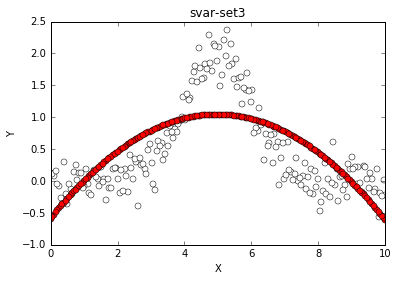

In [75]:
do_single_feature_polynomial_linear_regression_experiment("svar-set3",n=2)


Custom model's Avg Training error : 276.5177 & Avg Testing error : 270.7616 for 10 folds


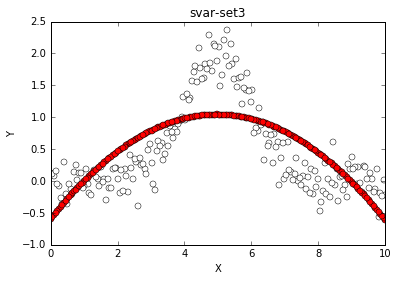

In [76]:
do_single_feature_polynomial_linear_regression_experiment("svar-set3",n=3)


Custom model's Avg Training error : 60.2236 & Avg Testing error : 283.0139 for 10 folds


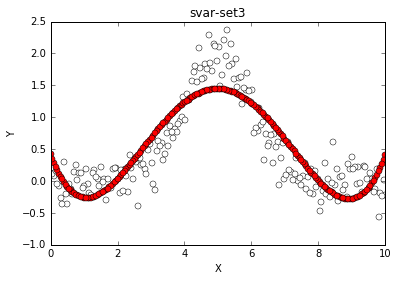

In [77]:
do_single_feature_polynomial_linear_regression_experiment("svar-set3",n=4)


Custom model's Avg Training error : 87.0685 & Avg Testing error : 276.7350 for 10 folds


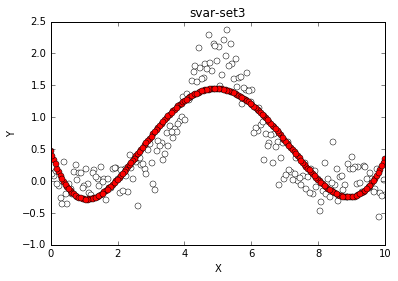

In [78]:
do_single_feature_polynomial_linear_regression_experiment("svar-set3",n=5)


Custom model's Avg Training error : 76.0980 & Avg Testing error : 1081.1334 for 10 folds


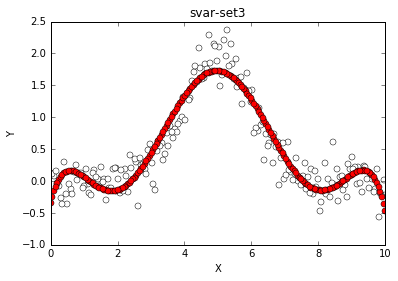

In [79]:
do_single_feature_polynomial_linear_regression_experiment("svar-set3",n=6)


Custom model's Avg Training error : 73.3912 & Avg Testing error : 921.7375 for 10 folds


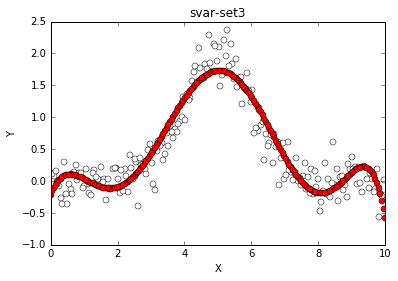

In [80]:
do_single_feature_polynomial_linear_regression_experiment("svar-set3",n=7)

### Fourth dataset : svar-set4 : : Single feature linear regression


Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.910361
 Intercept of custom's model : 0.910361
 Intercept of scikit's model : 0.008392
 Intercept of custom's model : 0.008392



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 1.094620
 Intercept of custom's model : 1.094620
 Intercept of scikit's model : -0.020837
 Intercept of custom's model : -0.020837



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 1.049353
 Intercept of custom's model : 1.049353
 Intercept of scikit's model : -0.012218
 Intercept of custom's model : -0.012218



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 0.987566
 Intercept of custom's model : 0.987566
 Intercept of scikit's model : -0.002078
 Intercept of custom's model : -0.002078



Differences in theta values of custom and scikitlearn's model
 Intercept of scikit's model : 

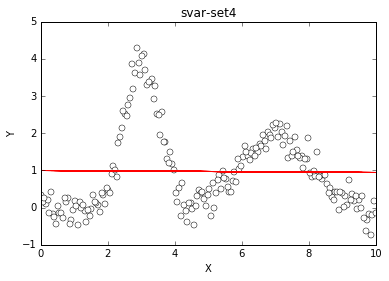

In [247]:
do_single_feature_linear_regression_experiment("svar-set4")

In [108]:
do_single_feature_linear_regression_experiment("svar-set4",n_folds = 2,verbose = False)

For Fold : 1
Training error : 1.2944 & Testing error : 1.1238
For Fold : 2
Training error : 1.0903 & Testing error : 1.3286

Custom model's Avg Training error : 1.1923 & Avg Testing error : 1.2262 for 2 folds


In [109]:
do_single_feature_linear_regression_experiment("svar-set4",n_folds = 5,verbose = False)

For Fold : 1
Training error : 1.2092 & Testing error : 1.1674
For Fold : 2
Training error : 1.2113 & Testing error : 1.1632
For Fold : 3
Training error : 1.2305 & Testing error : 1.0931
For Fold : 4
Training error : 1.1921 & Testing error : 1.2413
For Fold : 5
Training error : 1.1551 & Testing error : 1.3924

Custom model's Avg Training error : 1.1996 & Avg Testing error : 1.2115 for 5 folds


In [110]:
do_single_feature_linear_regression_experiment("svar-set4",n_folds = 7,verbose = False)

For Fold : 1
Training error : 1.2072 & Testing error : 1.1631
For Fold : 2
Training error : 1.2315 & Testing error : 1.0226
For Fold : 3
Training error : 1.1960 & Testing error : 1.2311
For Fold : 4
Training error : 1.2067 & Testing error : 1.1719
For Fold : 5
Training error : 1.2119 & Testing error : 1.1326
For Fold : 6
Training error : 1.1112 & Testing error : 1.7792
For Fold : 7
Training error : 1.2360 & Testing error : 0.9850

Custom model's Avg Training error : 1.2001 & Avg Testing error : 1.2122 for 7 folds


In [111]:
do_single_feature_linear_regression_experiment("svar-set4",n_folds = 10,verbose = False)

For Fold : 1
Training error : 1.1849 & Testing error : 1.3634
For Fold : 2
Training error : 1.2197 & Testing error : 1.0546
For Fold : 3
Training error : 1.2281 & Testing error : 0.9618
For Fold : 4
Training error : 1.1827 & Testing error : 1.3647
For Fold : 5
Training error : 1.2392 & Testing error : 0.8621
For Fold : 6
Training error : 1.1887 & Testing error : 1.3223
For Fold : 7
Training error : 1.1935 & Testing error : 1.2695
For Fold : 8
Training error : 1.2009 & Testing error : 1.2019
For Fold : 9
Training error : 1.1553 & Testing error : 1.6321
For Fold : 10
Training error : 1.2048 & Testing error : 1.1672

Custom model's Avg Training error : 1.1998 & Avg Testing error : 1.2200 for 10 folds


### Fourth dataset : svar-set4 : : Single feature polynomial regression


Custom model's Avg Training error : 13490.0687 & Avg Testing error : 55.0016 for 10 folds


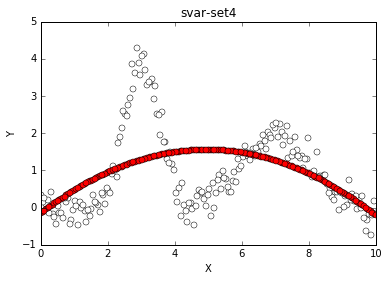

In [81]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=2)


Custom model's Avg Training error : 11546.2494 & Avg Testing error : 49.7644 for 10 folds


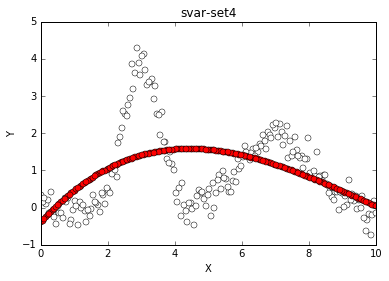

In [82]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=3)


Custom model's Avg Training error : 2198.1502 & Avg Testing error : 17.9764 for 10 folds


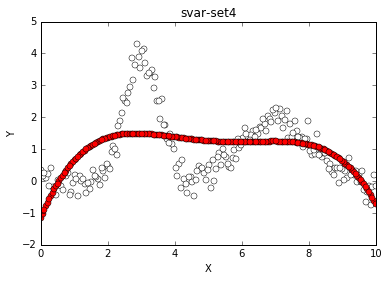

In [83]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=4)


Custom model's Avg Training error : 713.1801 & Avg Testing error : 11.1441 for 10 folds


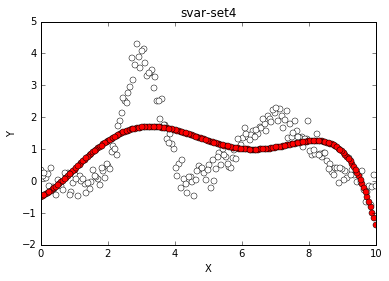

In [84]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=5)


Custom model's Avg Training error : 9699.9532 & Avg Testing error : 12.6217 for 10 folds


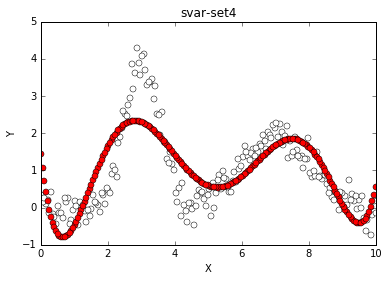

In [85]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=6)


Custom model's Avg Training error : 8735.4014 & Avg Testing error : 11.7530 for 10 folds


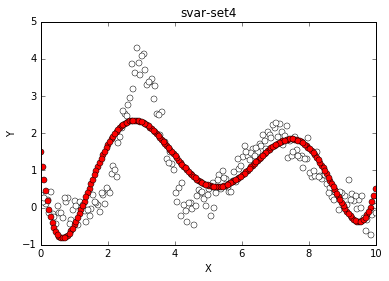

In [86]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=7)


Custom model's Avg Training error : 25975.1973 & Avg Testing error : 47.9675 for 10 folds


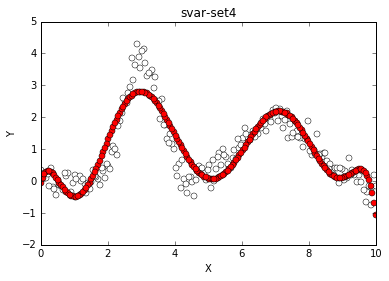

In [87]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=8)


Custom model's Avg Training error : 16679.4678 & Avg Testing error : 29.7679 for 10 folds


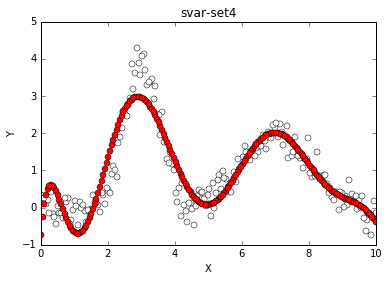

In [88]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=9)


Custom model's Avg Training error : 23787.5638 & Avg Testing error : 43.4192 for 10 folds


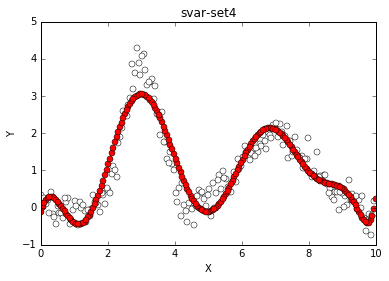

In [89]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=10)


Custom model's Avg Training error : 12778.7396 & Avg Testing error : 22.3982 for 10 folds


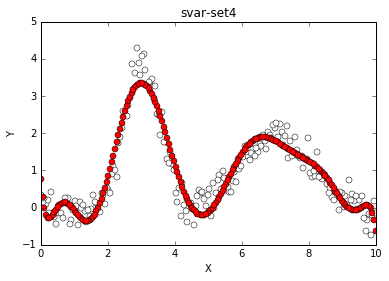

In [90]:
do_single_feature_polynomial_linear_regression_experiment("svar-set4",n=11)